In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from tabulate import tabulate



In [17]:
data = pd.read_csv("weight-height.csv")  
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
descriptive_stats = data.groupby('Gender').describe().stack(level=0)

# statistic for Height and Weight
height_stats = descriptive_stats.xs('Height', level=1)
weight_stats = descriptive_stats.xs('Weight', level=1)

# table
table_data = [['Statistic', 'Female', 'Male'],
              ['Height Mean'] + [f'{mean:.2f}' for mean in height_stats['mean'].tolist()],
              ['Height Std'] + [f'{std:.2f}' for std in height_stats['std'].tolist()],
              ['Height Min'] + [f'{min:.2f}' for min in height_stats['min'].tolist()],
              ['Height 25%'] + [f'{q25:.2f}' for q25 in height_stats['25%'].tolist()],
              ['Height 50%'] + [f'{q50:.2f}' for q50 in height_stats['50%'].tolist()],
              ['Height 75%'] + [f'{q75:.2f}' for q75 in height_stats['75%'].tolist()],
              ['Height Max'] + [f'{max:.2f}' for max in height_stats['max'].tolist()],
              ['Weight Mean'] + [f'{mean:.2f}' for mean in weight_stats['mean'].tolist()],
              ['Weight Std'] + [f'{std:.2f}' for std in weight_stats['std'].tolist()],
              ['Weight Min'] + [f'{min:.2f}' for min in weight_stats['min'].tolist()],
              ['Weight 25%'] + [f'{q25:.2f}' for q25 in weight_stats['25%'].tolist()],
              ['Weight 50%'] + [f'{q50:.2f}' for q50 in weight_stats['50%'].tolist()],
              ['Weight 75%'] + [f'{q75:.2f}' for q75 in weight_stats['75%'].tolist()],
              ['Weight Max'] + [f'{max:.2f}' for max in weight_stats['max'].tolist()]]

# show it using tabulate
print(tabulate(table_data, headers='firstrow', tablefmt='pretty'))


+-------------+--------+--------+
|  Statistic  | Female |  Male  |
+-------------+--------+--------+
| Height Mean | 63.71  | 69.03  |
| Height Std  |  2.70  |  2.86  |
| Height Min  | 54.26  | 58.41  |
| Height 25%  | 61.89  | 67.17  |
| Height 50%  | 63.73  | 69.03  |
| Height 75%  | 65.56  | 70.99  |
| Height Max  | 73.39  | 79.00  |
| Weight Mean | 135.86 | 187.02 |
| Weight Std  | 19.02  | 19.78  |
| Weight Min  | 64.70  | 112.90 |
| Weight 25%  | 122.93 | 173.89 |
| Weight 50%  | 136.12 | 187.03 |
| Weight 75%  | 148.81 | 200.36 |
| Weight Max  | 202.24 | 269.99 |
+-------------+--------+--------+


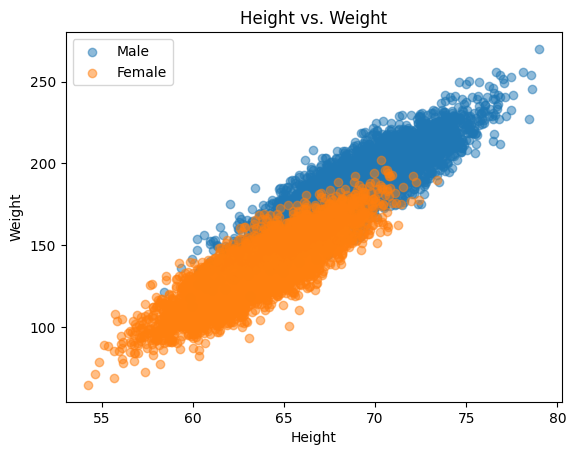

In [6]:

for gender in data['Gender'].unique():
    plt.scatter(data[data['Gender']==gender]['Height'], data[data['Gender']==gender]['Weight'], label=gender, alpha=0.5)
plt.title('Height vs. Weight')
plt.xlabel('Height')
plt.ylabel('Weight')

plt.legend()
plt.show()


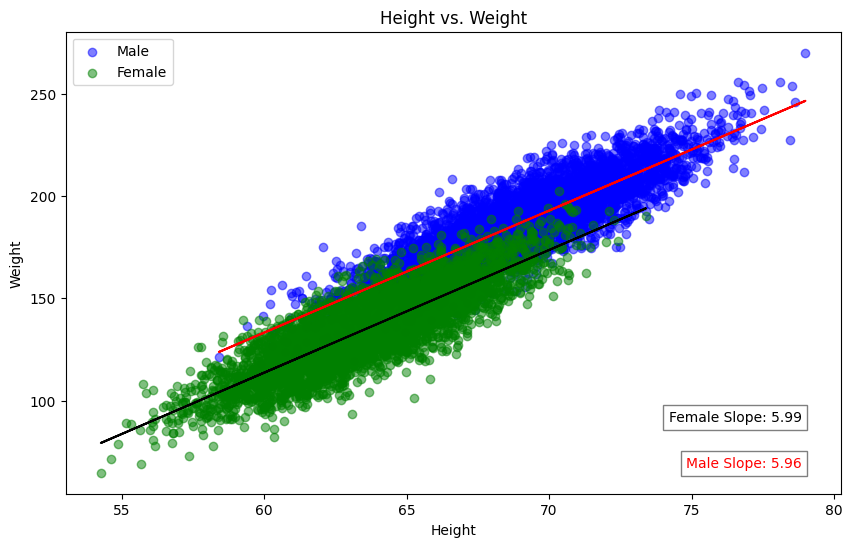

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


scatter_colors = ['blue', 'green']
line_colors = ['red','black']

# Create subplots
plt.figure(figsize=(10, 6))

# Plot scatter plots and linear regression lines for each gender
for i, gender in enumerate(data['Gender'].unique()):
    gender_data = data[data['Gender'] == gender]
    plt.scatter(gender_data['Height'], gender_data['Weight'], label=gender, alpha=0.5, color=scatter_colors[i])
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(gender_data['Height'].values.reshape(-1, 1), gender_data['Weight'])
    
    # Plot regression line with different color
    plt.plot(gender_data['Height'], model.predict(gender_data['Height'].values.reshape(-1, 1)), color=line_colors[i])

    slope = model.coef_[0]
    slope_text = f'{gender} Slope: {slope:.2f}'
    plt.text(0.95, 0.05 + i * 0.1, slope_text, color=line_colors[i], transform=plt.gca().transAxes, horizontalalignment='right', verticalalignment='bottom', bbox=dict(facecolor='white', alpha=0.5))

plt.title('Height vs. Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()


<div style="color: #000080;">

As we can see, for the both genders there is a linear trend between the Height and Weight and usually by increasing Height there is an increase in the Weight as well. Additionally, the slope of linear increase for Male is more than Female case and Male gender has a higher Height-Weight trend relative to the Female.
</div>


<span style="color:blue">
We can do a Non-parametric Regression as well. Non-parametric regression is a general framework for estimating the relationship between variables without assuming a specific functional form. In this case, the regression function is estimated directly from the data without specifying a predetermined model structure. Also, note that, there is also Nadaraya-Watson regression (as we have discussed in this repository about that in a separate folder) is a specific type of non-parametric regression   that uses kernel functions for weighting the contributions of neighboring data points.
Also, While LOWESS does not use a kernel function in the traditional sense, the concept of local weighting serves a similar purpose by assigning higher weights to nearby data points and lower weights to more distant points. This effectively achieves a form of local smoothing and adapts to the local behavior of the data, capturing nonlinear relationships without assuming a specific functional form.







</span>

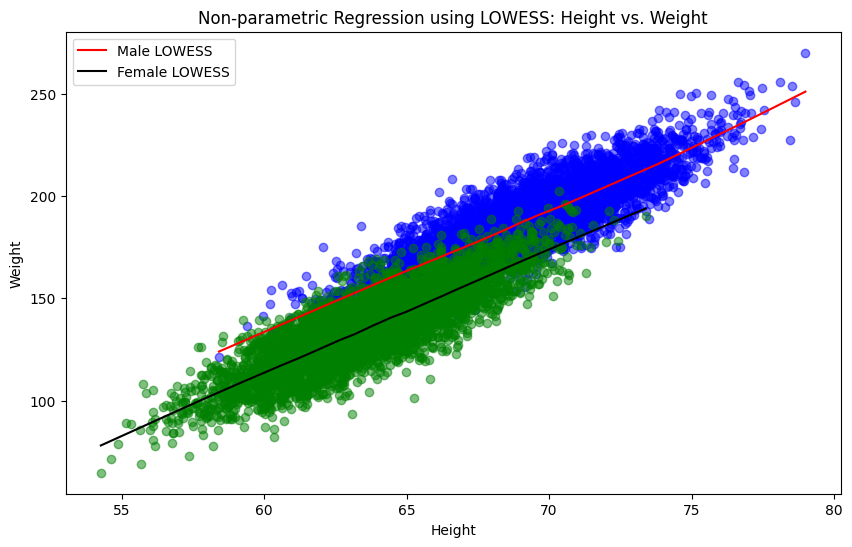

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess


male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

# Define the range of height values for prediction
height_range = np.linspace(data['Height'].min(), data['Height'].max(), 1000)

# Perform LOWESS regression for males
lowess_male = lowess(male_data['Weight'], male_data['Height'], frac=0.3)

# Perform LOWESS regression for females
lowess_female = lowess(female_data['Weight'], female_data['Height'], frac=0.3)

plt.figure(figsize=(10, 6))
plt.plot(lowess_male[:, 0], lowess_male[:, 1], label='Male LOWESS', color='red')  # Set color for male curve
plt.plot(lowess_female[:, 0], lowess_female[:, 1], label='Female LOWESS', color='black')  # Set color for female curve
plt.scatter(male_data['Height'], male_data['Weight'], color='blue', alpha=0.5)
plt.scatter(female_data['Height'], female_data['Weight'], color='green', alpha=0.5)
plt.title('Non-parametric Regression using LOWESS: Height vs. Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.grid(False)
plt.show()


<span style="color:blue">
    
As we can  see from te proposed curve (here a linear line) by the LOWSEE methos, still the trend between Height and Weight for both genders is the linear. 


</span>

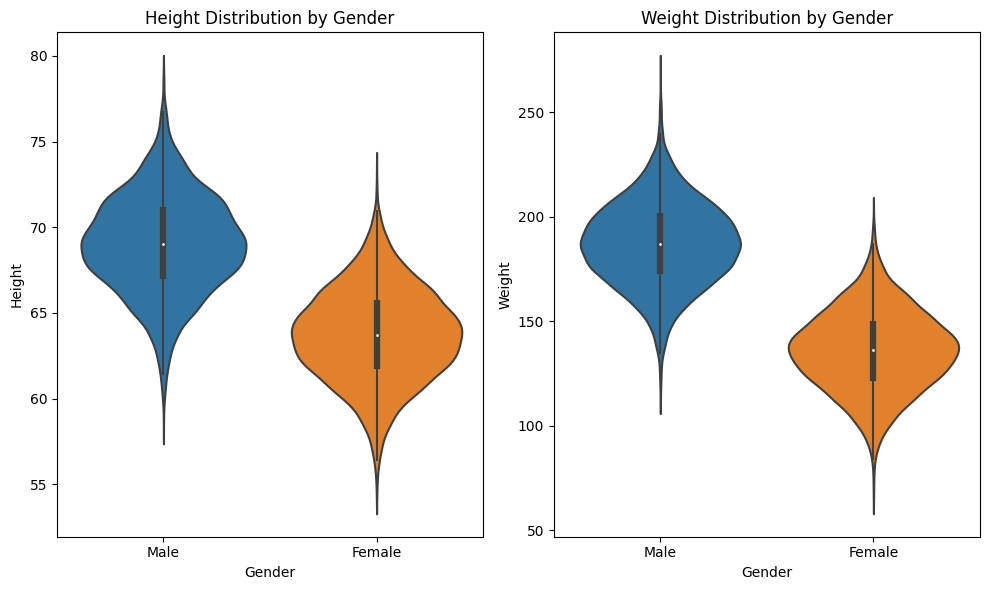

Correlation coefficient (Male): 0.8629788486163177
F-Statistic: 174254.01393141146
P-value: 0.0


In [32]:



# Violin plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='Gender', y='Height', data=data)
plt.title('Height Distribution by Gender')

plt.subplot(1, 2, 2)
sns.violinplot(x='Gender', y='Weight', data=data)
plt.title('Weight Distribution by Gender')

plt.tight_layout()
plt.show()

# Correlation Analysis
corr_height, _ = pearsonr(data[data['Gender']=='Male']['Height'], data[data['Gender']=='Male']['Weight'])
print("Correlation coefficient (Male):", corr_height)

# ANOVA
f_statistic, p_value = f_oneway(data[data['Gender']=='Male']['Height'], data[data['Gender']=='Male']['Weight'])
print("F-Statistic:", f_statistic)
print("P-value:", p_value)


## The p-value of 0 indicates that the probability of observing such extreme variation in the data under the null hypothesis (i.e., assuming there is no difference between the groups) is essentially zero. This leads to the rejection of the null hypothesis, suggesting that there are indeed statistically significant differences between the groups. In the context of ANOVA, a p-value of 0 typically means that there is strong evidence against the null hypothesis, indicating that at least one of the means of the groups is significantly different from the others.

In [34]:

from scipy.stats import ttest_ind
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Performing t-test
male_heights = data[data['Gender'] == 'Male']['Height']
female_heights = data[data['Gender'] == 'Female']['Height']

t_stat, p_value = ttest_ind(male_heights, female_heights)
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Performing PCA analysis
# First, we standardize the features
features = ['Height', 'Weight']
x = data.loc[:, features].values
x = StandardScaler().fit_transform(x)


T-statistic: 95.60271449148823
P-value: 0.0


/tmp/ipykernel_154088/1992764978.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  male_correlation_matrix = male_data.corr()
/tmp/ipykernel_154088/1992764978.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  female_correlation_matrix = female_data.corr()


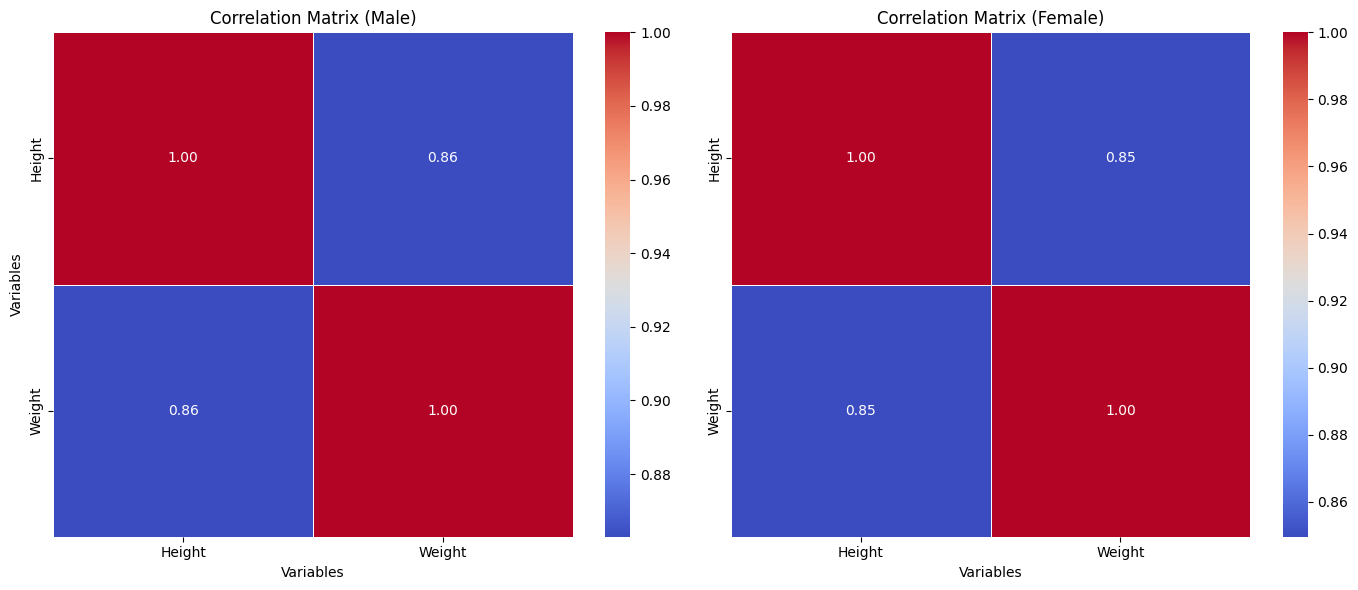

In [11]:
# Separate data for males and females
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

# Calculate correlation matrices for males and females
male_correlation_matrix = male_data.corr()
female_correlation_matrix = female_data.corr()

# Plot correlation matrices side by side
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(male_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Male)')
plt.xlabel('Variables')
plt.ylabel('Variables')

plt.subplot(1, 2, 2)
sns.heatmap(female_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Female)')
plt.xlabel('Variables')
plt.ylabel('')

plt.tight_layout()
plt.show()


## , we can perform A/B testing if we have a specific hypothesis to test and two different groups (A and B) to compare. In the context of your dataset, we could formulate a hypothesis related to height or weight, for example: Hypothesis: Males have a higher average height than females.

 ** To test this hypothesis using A/B testing, we could randomly split the dataset into two groups:

** Group A: Males
** Group B: Females

In [39]:
from scipy.stats import ttest_ind

# A/B testinf


# Split the dataset into two groups based on gender
group_a = df[df['Gender'] == 'Male']['Height']
group_b = df[df['Gender'] == 'Female']['Height']

# Perform A/B testing (two-sample t-test)
t_statistic, p_value = ttest_ind(group_a, group_b)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in height between males and females.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in height between males and females.")


Reject the null hypothesis. There is a significant difference in height between males and females.


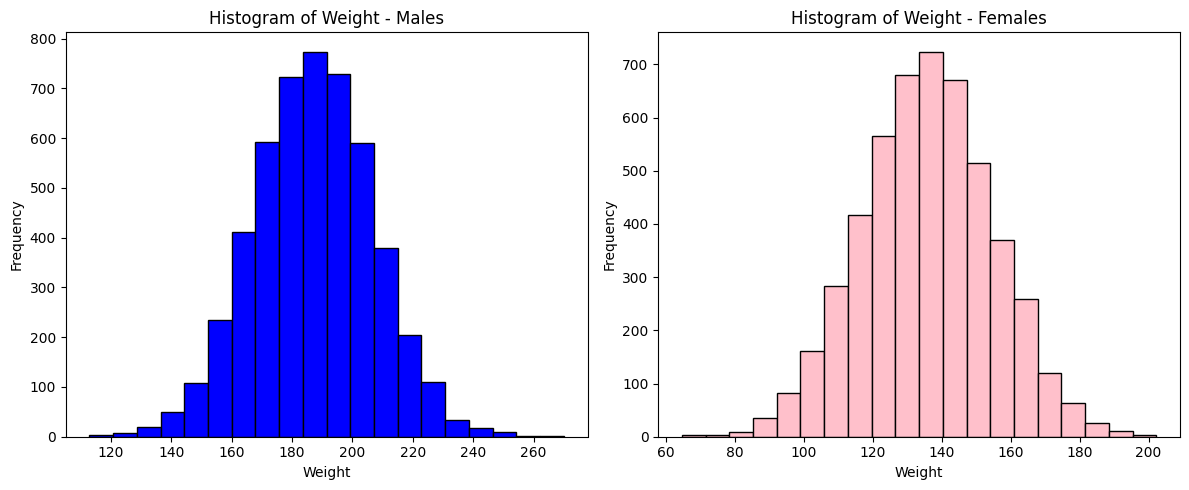

In [1]:

data = pd.read_csv("weight-height.csv")  # to be saved in the same folder as ex4.ipynb
#  by gender
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

plt.figure(figsize=(12, 5))  

# Hist. for males
plt.subplot(1, 2, 1)
plt.hist(male_data['Weight'], bins = 20, color = 'blue', edgecolor = 'black')
plt.title('Histogram of Weight - Males')
plt.xlabel('Weight')
plt.ylabel('Frequency')

# Hist. for females
plt.subplot(1, 2, 2)
plt.hist(female_data['Weight'], bins = 20, color = 'pink', edgecolor = 'black')
plt.title('Histogram of Weight - Females')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [1]:

data = pd.read_csv("weight-height.csv")  # to be saved in the same folder as ex4.ipynb
#  by gender
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

plt.figure(figsize=(12, 5))  

# Hist. for males
plt.subplot(1, 2, 1)
plt.hist(male_data['Height'], bins = 20, color = 'blue', edgecolor = 'black')
plt.title('Histogram of Height - Males')
plt.xlabel('Height')
plt.ylabel('Frequency')

# Hist. for females
plt.subplot(1, 2, 2)
plt.hist(female_data['Height'], bins = 20, color = 'pink', edgecolor = 'black')
plt.title('Histogram of Height - Females')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


NameError: name 'pd' is not defined

In [2]:
male_data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
4995,Male,68.860062,177.131052
4996,Male,68.973423,159.285228
4997,Male,67.013795,199.195400
4998,Male,71.557718,185.905909


# To find the best band-width for all the four cases. we have established a procedure to find the best h and applied it to all fours cases (male-weight, male-height, female weight, female height).  The results are presented here, and the python code is also attached.
# In each case, we have used a 10 fold cross-validation. 

# find the band width for the Weight of Male distribution

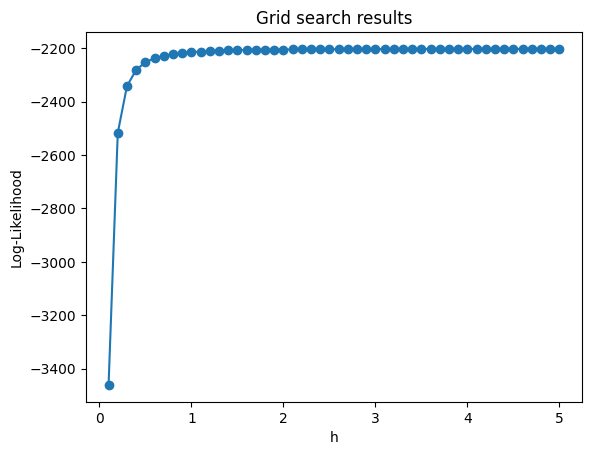

In [3]:
weight_data = male_data['Weight'].values.reshape(-1, 1) # GridSearchCV expects 2D array-like object
bandwidths = np.linspace(0.1, 5.0, 50)  # bandwidth range.

# GridSearchCV estimator
grid_search = GridSearchCV(KernelDensity(),
                           {'bandwidth': bandwidths},
                           cv=10)  # 10-fold cross-validation the and default Kernel is gaussina. 

grid_search.fit(weight_data)
results_df1 = pd.DataFrame(grid_search.cv_results_)   # results_df1 contains all the metrics.

plt.plot(results_df1['param_bandwidth'], results_df1['mean_test_score'], marker='o')
plt.title('Grid search results')
plt.xlabel('h')
plt.ylabel('Log-Likelihood')
plt.show()



# A higher (less negative) log-likelihood suggests a better fit.  Larger (less negative) log-likelihood values indicate that the chosen bandwidth is providing a better fit to our data. 

In [4]:
# let's look at the h, log-likelihood and the difference between log-likelihood in each step

results_df1['score_difference'] = results_df1['mean_test_score'].diff()
new_df = results_df1[['param_bandwidth', 'mean_test_score', 'score_difference']].copy()
print(new_df)

   param_bandwidth  mean_test_score  score_difference
0              0.1     -3460.711097               NaN
1              0.2     -2516.797157        943.913940
2              0.3     -2341.967863        174.829294
3              0.4     -2281.052796         60.915067
4              0.5     -2252.918065         28.134731
5              0.6     -2237.574028         15.344037
6              0.7     -2228.248107          9.325921
7              0.8     -2222.137587          6.110520
8              0.9     -2217.910318          4.227269
9              1.0     -2214.865581          3.044737
10             1.1     -2212.603757          2.261824
11             1.2     -2210.881301          1.722456
12             1.3     -2209.541847          1.339454
13             1.4     -2208.481038          1.060809
14             1.5     -2207.627221          0.853816
15             1.6     -2206.930109          0.697112
16             1.7     -2206.353740          0.576369
17             1.8     -2205

# We take the h which has score_difference positive and converged.

# h = 4.7 and >0

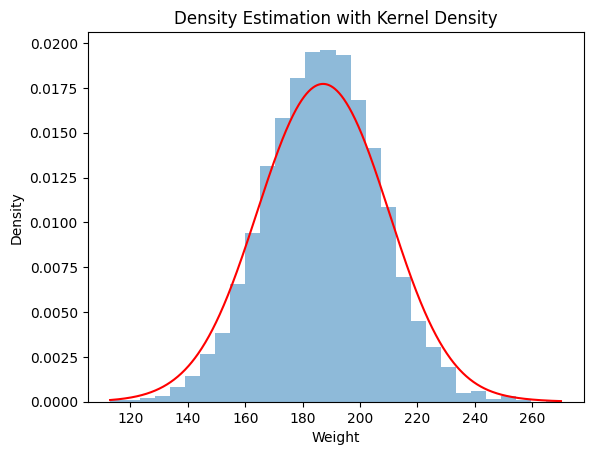

In [5]:
chosen_bandwidth = 1.7

weight_data = male_data['Weight'].values.reshape(-1, 1)

# Fit the kernel density estimator with the chosen bandwidth
kde = KernelDensity(bandwidth=chosen_bandwidth)
kde.fit(weight_data)

x_values = np.linspace(weight_data.min(), weight_data.max(), 1000).reshape(-1, 1)

# log likelihood for each x value
log_likelihoods = kde.score_samples(x_values)

plt.hist(weight_data, bins = 30, density = True, alpha = 0.5, label = 'Histogram')
plt.plot(x_values, np.exp(log_likelihoods), label = f'Kernel Density (Bandwidth={chosen_bandwidth})', color = 'red')

plt.title('Density Estimation with Kernel Density')
plt.xlabel('Weight')
plt.ylabel('Density')
plt.show()


## find the band width for the Height of Male

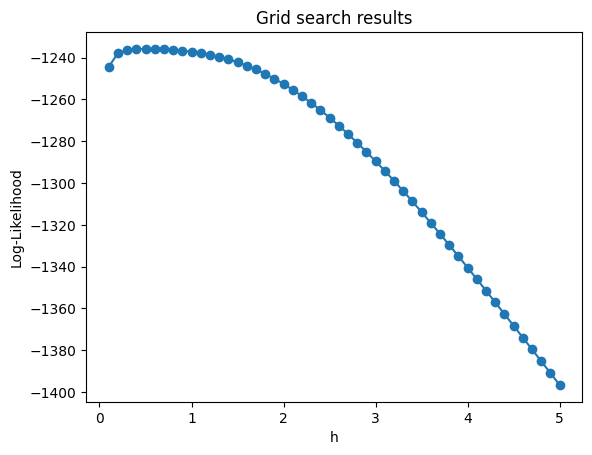

In [5]:
weight_data = male_data['Height'].values.reshape(-1, 1) # GridSearchCV expects 2D array-like object
bandwidths = np.linspace(0.1, 5.0, 50)  # bandwidth range.

# GridSearchCV meta-estimator
grid_search = GridSearchCV(KernelDensity(),
                           {'bandwidth': bandwidths},
                           cv=10)  # 10-fold cross-validation  

grid_search.fit(weight_data)
results_df2 = pd.DataFrame(grid_search.cv_results_)   # results_df contains all the metrics.

plt.plot(results_df2['param_bandwidth'], results_df2['mean_test_score'], marker='o')
plt.title('Grid search results')
plt.xlabel('h')
plt.ylabel('Log-Likelihood')
plt.show()


In [6]:
# here we have the 
results_df2['score_difference'] = results_df2['mean_test_score'].diff()
new_df = results_df2[['param_bandwidth', 'mean_test_score', 'score_difference']].copy()
print(new_df)

   param_bandwidth  mean_test_score  score_difference
0              0.1     -1244.425477               NaN
1              0.2     -1237.781778          6.643699
2              0.3     -1236.387287          1.394491
3              0.4     -1235.921134          0.466153
4              0.5     -1235.793573          0.127560
5              0.6     -1235.829861         -0.036287
6              0.7     -1235.976816         -0.146956
7              0.8     -1236.226150         -0.249334
8              0.9     -1236.587853         -0.361703
9              1.0     -1237.079829         -0.491976
10             1.1     -1237.722168         -0.642339
11             1.2     -1238.533970         -0.811801
12             1.3     -1239.531994         -0.998024
13             1.4     -1240.730318         -1.198324
14             1.5     -1242.140356         -1.410038
15             1.6     -1243.770937         -1.630581
16             1.7     -1245.628364         -1.857427
17             1.8     -1247

# h = 0.5 

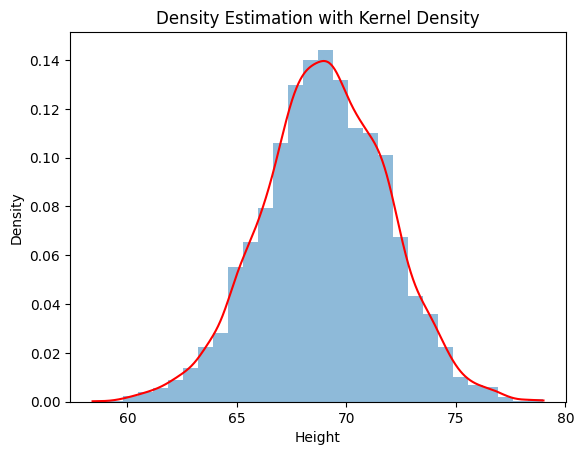

In [7]:
chosen_bandwidth = 0.5

weight_data = male_data['Height'].values.reshape(-1, 1)

# Fit the kernel density estimator with the chosen bandwidth
kde = KernelDensity(bandwidth=chosen_bandwidth)
kde.fit(weight_data)

x_values = np.linspace(weight_data.min(), weight_data.max(), 1000).reshape(-1, 1)

# log likelihood for each x value
log_likelihoods = kde.score_samples(x_values)

plt.hist(weight_data, bins = 30, density = True, alpha = 0.5, label = 'Histogram')
plt.plot(x_values, np.exp(log_likelihoods), label = f'Kernel Density (Bandwidth={chosen_bandwidth})', color = 'red')

plt.title('Density Estimation with Kernel Density')
plt.xlabel('Height')
plt.ylabel('Density')
plt.show()


# find the band width for the Weight of Female

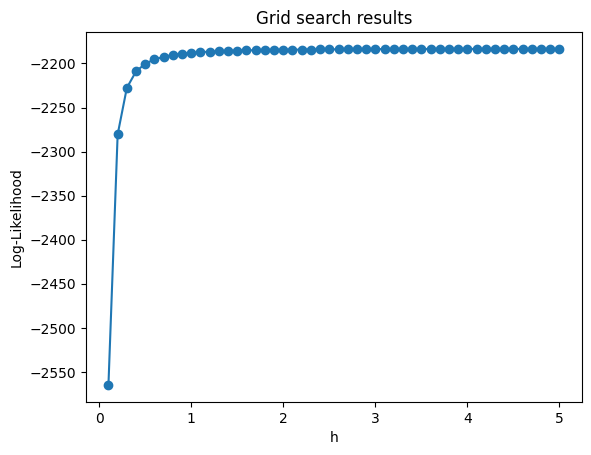

In [8]:
weight_data = female_data['Weight'].values.reshape(-1, 1) # GridSearchCV expects 2D array-like object
bandwidths = np.linspace(0.1, 5.0, 50)  # bandwidth range.

# GridSearchCV meta-estimator
grid_search = GridSearchCV(KernelDensity(),
                           {'bandwidth': bandwidths},
                           cv=10)  # 10-fold cross-validation  

grid_search.fit(weight_data)
results_df3 = pd.DataFrame(grid_search.cv_results_)   # results_df contains all the metrics.

plt.plot(results_df3['param_bandwidth'], results_df3['mean_test_score'], marker='o')
plt.title('Grid search results')
plt.xlabel('h')
plt.ylabel('Log-Likelihood')
plt.show()

In [9]:
results_df3['score_difference'] = results_df3['mean_test_score'].diff()
new_df = results_df3[['param_bandwidth', 'mean_test_score', 'score_difference']].copy()
print(new_df)

   param_bandwidth  mean_test_score  score_difference
0              0.1     -2564.777299               NaN
1              0.2     -2280.524414        284.252885
2              0.3     -2227.609775         52.914639
3              0.4     -2208.975265         18.634510
4              0.5     -2200.230738          8.744527
5              0.6     -2195.373589          4.857149
6              0.7     -2192.360309          3.013280
7              0.8     -2190.346839          2.013470
8              0.9     -2188.931263          1.415576
9              1.0     -2187.898701          1.032562
10             1.1     -2187.123505          0.775195
11             1.2     -2186.527297          0.596208
12             1.3     -2186.058936          0.468361
13             1.4     -2185.683985          0.374951
14             1.5     -2185.378678          0.305307
15             1.6     -2185.126245          0.252433
16             1.7     -2184.914599          0.211646
17             1.8     -2184

# h = 4.2 (we look at score_difference column, converged value and > 0)

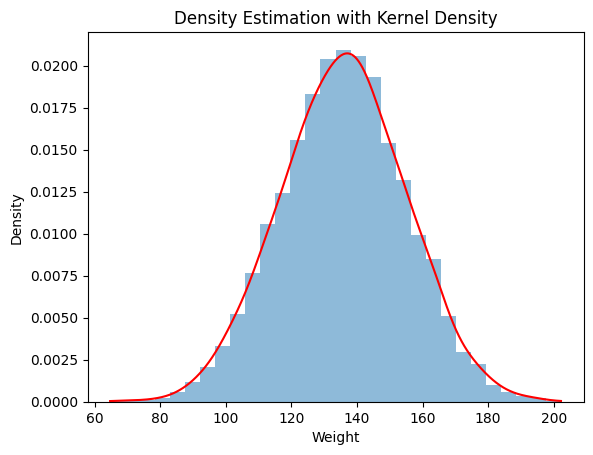

In [10]:
chosen_bandwidth = 4.2

weight_data = female_data['Weight'].values.reshape(-1, 1)

# Fit the kernel density estimator with the chosen bandwidth
kde = KernelDensity(bandwidth=chosen_bandwidth)
kde.fit(weight_data)

x_values = np.linspace(weight_data.min(), weight_data.max(), 1000).reshape(-1, 1)

# density for each x value
log_likelihoods = kde.score_samples(x_values)

plt.hist(weight_data, bins=30, density=True, alpha=0.5, label='Histogram')
plt.plot(x_values, np.exp(log_likelihoods), label=f'Kernel Density (Bandwidth={chosen_bandwidth})', color='red')

plt.title('Density Estimation with Kernel Density')
plt.xlabel('Weight')
plt.ylabel('Density')
plt.show()


# find the band width for the Height of Female

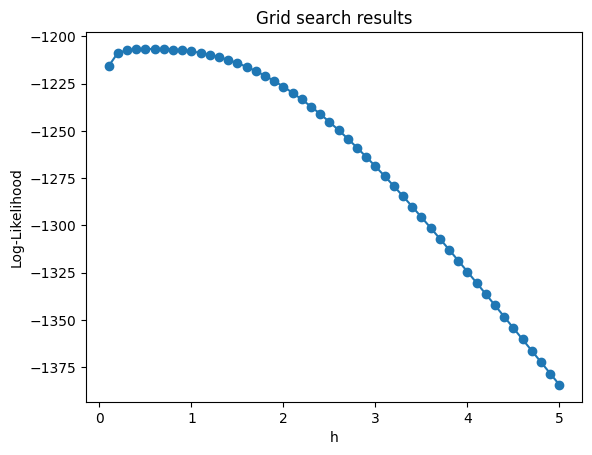

In [11]:
weight_data = female_data['Height'].values.reshape(-1, 1) # GridSearchCV expects 2D array-like object
bandwidths = np.linspace(0.1, 5.0, 50)  # bandwidth range.

# GridSearchCV meta-estimator
grid_search = GridSearchCV(KernelDensity(),
                           {'bandwidth': bandwidths},
                           cv=10)  # 10-fold cross-validation  

grid_search.fit(weight_data)
results_df4 = pd.DataFrame(grid_search.cv_results_)   # results_df contains all the metrics.

plt.plot(results_df4['param_bandwidth'], results_df4['mean_test_score'], marker='o')
plt.title('Grid search results')
plt.xlabel('h')
plt.ylabel('Log-Likelihood')
plt.show()


In [12]:
results_df4['score_difference'] = results_df4['mean_test_score'].diff()
new_df = results_df4[['param_bandwidth', 'mean_test_score', 'score_difference']].copy()
print(new_df)

   param_bandwidth  mean_test_score  score_difference
0              0.1     -1215.774799               NaN
1              0.2     -1208.705620          7.069179
2              0.3     -1207.312218          1.393402
3              0.4     -1206.822668          0.489551
4              0.5     -1206.635111          0.187557
5              0.6     -1206.603222          0.031889
6              0.7     -1206.701245         -0.098023
7              0.8     -1206.939515         -0.238270
8              0.9     -1207.336910         -0.397395
9              1.0     -1207.913636         -0.576726
10             1.1     -1208.689149         -0.775512
11             1.2     -1209.681001         -0.991852
12             1.3     -1210.904189         -1.223188
13             1.4     -1212.370845         -1.466656
14             1.5     -1214.090116         -1.719271
15             1.6     -1216.068140         -1.978024
16             1.7     -1218.308108         -2.239968
17             1.8     -1220

# h = 0.6 (we look at score_difference column, converged value and > 0)

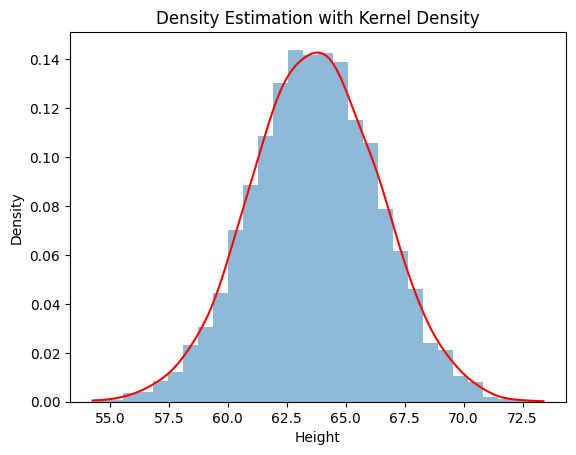

In [13]:
chosen_bandwidth = 0.6

weight_data = female_data['Height'].values.reshape(-1, 1)

# Fit the kernel density estimator with the chosen bandwidth
kde = KernelDensity(bandwidth=chosen_bandwidth)
kde.fit(weight_data)

x_values = np.linspace(weight_data.min(), weight_data.max(), 1000).reshape(-1, 1)

# density for each x value
log_likelihoods = kde.score_samples(x_values)

plt.hist(weight_data, bins=30, density=True, alpha=0.5, label='Histogram')
plt.plot(x_values, np.exp(log_likelihoods), label=f'Kernel Density (Bandwidth={chosen_bandwidth})', color='red')

plt.title('Density Estimation with Kernel Density')
plt.xlabel('Height')
plt.ylabel('Density')
plt.show()
